<a href="https://colab.research.google.com/github/arutraj/ML_Basics/blob/main/Emergency_vs_Non_Emergency_Vehicle_Sound_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Overview

By the end of this notebook, you will understand how to-

* Work with the audio data
* Represent an audio data - Time Domain and Spectrogram
* Build a deep learning model while working with audio data


# Understanding the Problem Statement

According to the National Crime Records Bureau, nearly 24,012 people die each day due to a delay in getting medical assistance

Nearly 4,40,042 accident cases are reported across the country each year, of which 1,39,091 people lose their life. The first hour after the incident, or the Golden Hour, is critical. Many accident victims wait for help at the site, and a delay costs them their life. The reasons could range from ambulances stuck in traffic to the fire brigade not being able to reach the site on time due to traffic jams

![alt text](https://drive.google.com/uc?id=1jO01r94g_1Xg0lf_ESPO0hnGOA0x1Aj1)


The solution to the above problem is to create an alarm system which detects the emergency vehicle prior to reaching the traffic signals and change the traffic signals accordingly.

# Dataset

Download the dataset from [here](https://drive.google.com/file/d/1VBI_X6GyYvf8j3T70-_hVDyhR_sUzeCr/view?usp=sharing)

# Implementation


So, in this notebook, let us create a deep learning model to detect the emergency vehicle based on the audio.



**Import Libraries**

Let us first import the libraries into our environment

* **Librosa** is an open source library in Python that is used audio and music analyis

* **Scipy** is a python library for scientific & technical computing. It contains modules for signal processing, image processing, linear algebera and so on.

In [1]:
#Audio Processing Libraries
import librosa
from scipy import signal

#For Playing Audio
import IPython.display as ipd

#Array Processing
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt

**What is an Audio signal?**

When an object vibrates, the air molecules oscillate to and fro from their rest position and transmits its energy to neighboring molecules. This results in the transmission of energy from one molecule to another which in turn produces a sound wave.



![alt text](https://drive.google.com/uc?id=1fUPHlzsGRhtv-L_-nHpV5kYtq8KdZwZV)

**How to analyze Audio Signal?**


**Time Domain**

Let us analyze the audio data in time domain now. Librosa loads an audio file as a floating point time series according to the user specified sampling rate

![alt text](https://drive.google.com/uc?id=1LZuYPQPRFnxTtwD_oMYTuHQ2uXAud3Gm)


**Sampling Rate** is defined as the no. of samples per second. For example, consider an audio wave of 2 seconds with a sampling rate of 16,000 (that is 16,000 samples per second). Now, we will have 32,000 samples recorded at different intervals of 2 seconds

Let us read the audio signal with sampling rate of 16000

In [9]:
!unzip '/content/audio'

Archive:  /content/audio
replace non emergency.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: non emergency.wav       
replace __MACOSX/._non emergency.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace __MACOSX/._non emergency.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: __MACOSX/._non emergency.wav  
replace emergency.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: emergency.wav           
replace __MACOSX/._emergency.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: __MACOSX/._emergency.wav  


In [10]:
path='/content/emergency.wav'
emergency,sample_rate    = librosa.load(path, sr = 16000)

path='/content/non emergency.wav'
non_emergency,sample_rate= librosa.load(path, sr =16000)

In [7]:
import scipy
scipy.__version__

'1.11.4'

In [5]:
librosa.__version__

'0.10.2.post1'

Compute the duration of a clip

In [12]:
duration1 = librosa.get_duration(y=emergency,sr=16000)
duration2 = librosa.get_duration(y=non_emergency,sr=16000)

print("Duration of an emergency and Non Emergency (in min):",duration1/60,duration2/60)

Duration of an emergency and Non Emergency (in min): 22.920290625 27.160834375


**Preparing Data**

Let us break the audio into chunks of 2 seconds. So, let us define the function for the same task

In [13]:
def prepare_data(samples, num_of_samples=32000, num_of_common=16000):

  data=[]
  for offset in range(0, len(samples), num_of_common):
    start = offset
    end   = offset + num_of_samples
    chunk = samples[start:end]

    if(len(chunk)==32000):
      data.append(chunk)

  return data

Call the above function

In [14]:
emergency = prepare_data(emergency)
non_emergency = prepare_data(non_emergency)

In [15]:
print("No. of Chunks of Emergency and Non Emergency:",len(emergency),len(non_emergency))

No. of Chunks of Emergency and Non Emergency: 1374 1628


Lets listen to some of the clips

In [16]:
ipd.Audio(emergency[100],rate=16000)

In [17]:
ipd.Audio(emergency[136],rate=16000)

In [18]:
ipd.Audio(non_emergency[200],rate=16000)

In [21]:
ipd.Audio(non_emergency[10],rate=32000)

**Visualization of an Audio wave**

Lets visualize the audio wave in time domain

Text(0, 0.5, 'Amplitude')

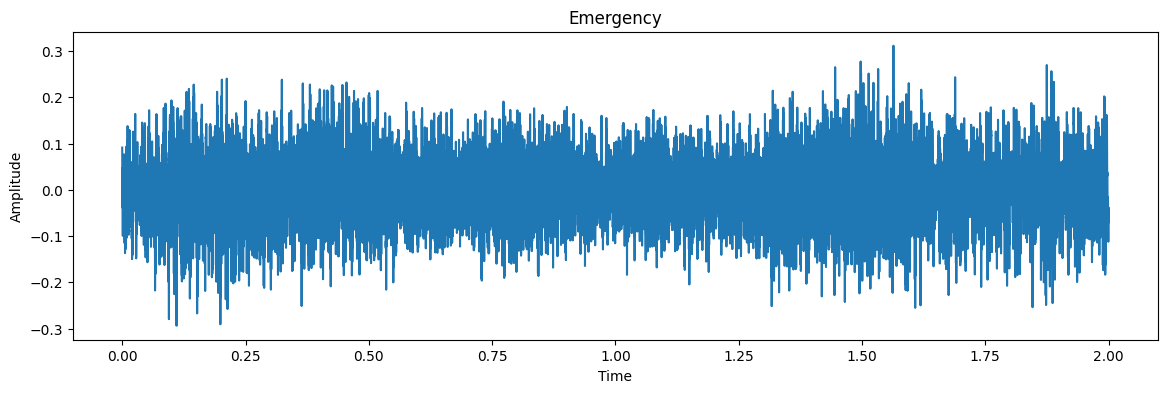

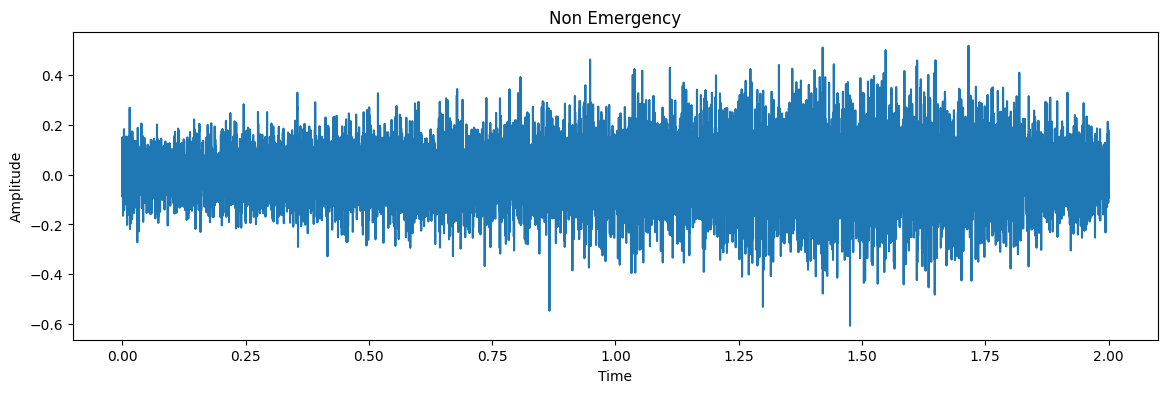

In [22]:
plt.figure(figsize=(14,4))
plt.plot(np.linspace(0, 2, num=32000),emergency[103])
plt.title('Emergency')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.figure(figsize=(14,4))
plt.plot(np.linspace(0, 2, num=32000),non_emergency[102])
plt.title('Non Emergency')
plt.xlabel('Time')
plt.ylabel('Amplitude')

Combine Emergecy and Non Emergency chunks

In [23]:
audio = np.concatenate([emergency,non_emergency])

Create the output label based on the no. of chunks in each class

In [24]:
labels1 = np.zeros(len(emergency))
labels2 = np.ones(len(non_emergency))

labels = np.concatenate([labels1,labels2])

Take a glance at the shape of the audio waves

In [25]:
print(audio.shape)

(3002, 32000)


**Split into train and validation set**

Next, we will train the model on 90% of the data and validate on the remaining 10%:

In [26]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(np.array(audio),np.array(labels),stratify=labels,test_size = 0.1,random_state=777,shuffle=True)

The input to the conv1d must be 3 dimensional array - (no. of samples, timesteps, features)

So, lets reshape our input array according to the required shape

In [28]:
x_tr.shape, x_val.shape, y_tr.shape, y_val.shape

((2701, 32000), (301, 32000), (2701,), (301,))

In [27]:
x_tr_features  = x_tr.reshape(len(x_tr),-1,1)
x_val_features = x_val.reshape(len(x_val),-1,1)

print("Reshaped Array Size",x_tr_features.shape)

Reshaped Array Size (2701, 32000, 1)


**Model Architecture**

Lets define the model architecture using conv1D layers as it performs convolution only along one dimension

In [30]:
from keras.layers import *
from keras.models import *
from keras.callbacks import *
from keras import backend as K

def conv1d(x_tr):
  K.clear_session()
  inputs = Input(shape=(x_tr.shape[1],x_tr.shape[2]))

  #First Conv1D layer
  conv = Conv1D(8, 13, padding='same', activation='relu')(inputs)
  conv = Dropout(0.3)(conv)
  conv = MaxPooling1D(2)(conv)

  #Second Conv1D layer
  conv = Conv1D(16, 11, padding='same', activation='relu')(conv)
  conv = Dropout(0.3)(conv)
  conv = MaxPooling1D(2)(conv)

  #MaxPooling 1D
  conv = GlobalMaxPool1D()(conv)

  #Dense Layer
  conv = Dense(16, activation='relu')(conv)
  outputs = Dense(1,activation='sigmoid')(conv)

  model = Model(inputs, outputs)

  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
  model_checkpoint = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

  return model, model_checkpoint

Define the model:

In [31]:
model, model_checkpoint = conv1d(x_tr_features)

Understand the shape and parameters at each layer

In [32]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32000, 1)]        0         
                                                                 
 conv1d (Conv1D)             (None, 32000, 8)          112       
                                                                 
 dropout (Dropout)           (None, 32000, 8)          0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 16000, 8)          0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 16000, 16)         1424      
                                                                 
 dropout_1 (Dropout)         (None, 16000, 16)         0         
                                                             

Lets train the model for 10 epochs with batch size of 32:

In [33]:
history=model.fit(x_tr_features, y_tr ,epochs=10, callbacks=[model_checkpoint], batch_size=32, validation_data=(x_val_features,y_val))

Epoch 1/10
85/85 [==============================] - ETA: 0s - loss: 0.5753 - acc: 0.7701
Epoch 1: val_acc improved from -inf to 0.79734, saving model to best_model.hdf5
85/85 [==============================] - 82s 943ms/step - loss: 0.5753 - acc: 0.7701 - val_loss: 0.5487 - val_acc: 0.7973
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


85/85 [==============================] - ETA: 0s - loss: 0.4177 - acc: 0.8486
Epoch 2: val_acc improved from 0.79734 to 0.85382, saving model to best_model.hdf5
85/85 [==============================] - 82s 972ms/step - loss: 0.4177 - acc: 0.8486 - val_loss: 0.4423 - val_acc: 0.8538
Epoch 3/10
85/85 [==============================] - ETA: 0s - loss: 0.3476 - acc: 0.8645
Epoch 3: val_acc improved from 0.85382 to 0.86711, saving model to best_model.hdf5
85/85 [==============================] - 80s 939ms/step - loss: 0.3476 - acc: 0.8645 - val_loss: 0.3927 - val_acc: 0.8671
Epoch 4/10
85/85 [==============================] - ETA: 0s - loss: 0.3260 - acc: 0.8678
Epoch 4: val_acc did not improve from 0.86711
85/85 [==============================] - 82s 961ms/step - loss: 0.3260 - acc: 0.8678 - val_loss: 0.3703 - val_acc: 0.8671
Epoch 5/10
85/85 [==============================] - ETA: 0s - loss: 0.3168 - acc: 0.8749
Epoch 5: val_acc improved from 0.86711 to 0.87043, saving model to best_model

Load the best model

In [34]:
model.load_weights('best_model.hdf5')

Evaluate the model on hold out set

In [36]:
_, acc = model.evaluate(x_val_features,y_val)
print("Validation Accuracy:",acc)

10/10 [==============================] - 2s 171ms/step - loss: 0.3398 - acc: 0.8837
Validation Accuracy: 0.8837209343910217


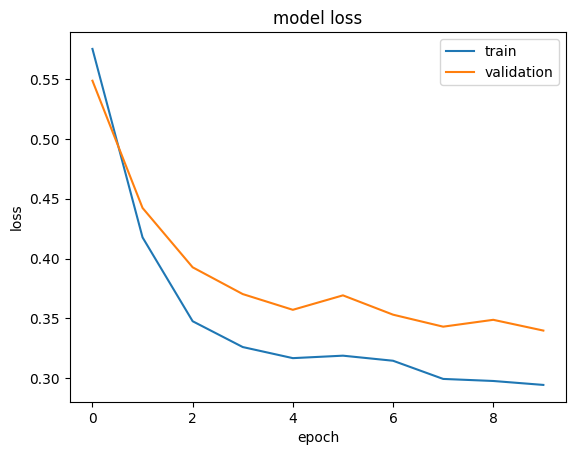

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper right')
plt.show()

**Inference**

Let us make predictions on the hold out set

In [43]:
ind=34
test_audio = x_val[ind]
ipd.Audio(test_audio,rate=16000)

In [44]:
feature = x_val_features[ind]
prob = model.predict(feature.reshape(1,-1,1))
if (prob[0][0] < 0.5 ):
  pred='emergency'
else:
  pred='non emergency'

print("Prediction:",pred)

1/1 [==============================] - 0s 29ms/step
Prediction: non emergency


In [ ]:
#lstm

In [45]:
x_tr_features  = x_tr.reshape(len(x_tr),-1,160)
x_val_features = x_val.reshape(len(x_val),-1,160)

print("Reshaped Array Size",x_tr_features.shape)

Reshaped Array Size (2701, 200, 160)


In [46]:
def lstm(x_tr):
  K.clear_session()
  inputs = Input(shape=(x_tr.shape[1],x_tr.shape[2]))

  #lstm
  x = LSTM(128)(inputs)
  x = Dropout(0.3)(x)

  #dense
  x= Dense(64,activation='relu')(x)
  x= Dense(1,activation='sigmoid')(x)

  model = Model(inputs, x)

  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

  return model

In [48]:
#model, mc = lstm(x_tr_features)
model  = lstm(x_tr_features)

In [49]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 160)]        0         
                                                                 
 lstm (LSTM)                 (None, 128)               147968    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 156289 (610.50 KB)
Trainable params: 156289 (610.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [51]:
history=model.fit(x_tr_features, y_tr, epochs=10, callbacks=[mc], batch_size=32, validation_data=(x_val_features,y_val))

Epoch 1/10
85/85 [==============================] - ETA: 0s - loss: 0.6729 - acc: 0.6064
Epoch 1: val_acc improved from -inf to 0.67110, saving model to best_model.hdf5
85/85 [==============================] - 34s 355ms/step - loss: 0.6729 - acc: 0.6064 - val_loss: 0.5985 - val_acc: 0.6711
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


85/85 [==============================] - ETA: 0s - loss: 0.6012 - acc: 0.6842
Epoch 2: val_acc did not improve from 0.67110
85/85 [==============================] - 30s 353ms/step - loss: 0.6012 - acc: 0.6842 - val_loss: 0.5946 - val_acc: 0.6678
Epoch 3/10
85/85 [==============================] - ETA: 0s - loss: 0.5467 - acc: 0.7164
Epoch 3: val_acc improved from 0.67110 to 0.71096, saving model to best_model.hdf5
85/85 [==============================] - 29s 345ms/step - loss: 0.5467 - acc: 0.7164 - val_loss: 0.5423 - val_acc: 0.7110
Epoch 4/10
85/85 [==============================] - ETA: 0s - loss: 0.5186 - acc: 0.7260
Epoch 4: val_acc improved from 0.71096 to 0.72425, saving model to best_model.hdf5
85/85 [==============================] - 30s 353ms/step - loss: 0.5186 - acc: 0.7260 - val_loss: 0.5348 - val_acc: 0.7243
Epoch 5/10
85/85 [==============================] - ETA: 0s - loss: 0.5183 - acc: 0.7497
Epoch 5: val_acc improved from 0.72425 to 0.74419, saving model to best_model

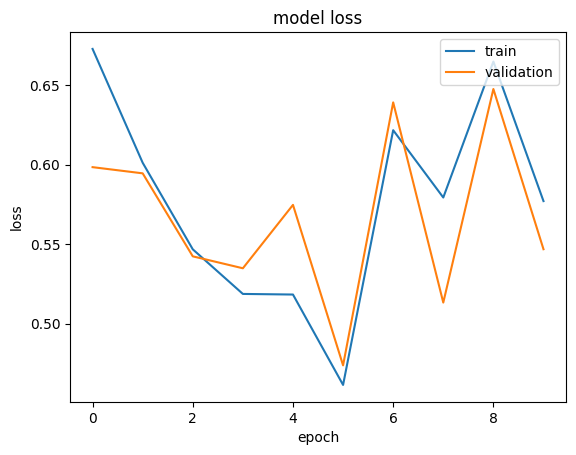

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper right')
plt.show()

In [52]:
model.load_weights('best_model.hdf5')

In [53]:
_,acc = model.evaluate(x_val_features,y_val)
print("Accuracy:",acc)

10/10 [==============================] - 1s 111ms/step - loss: 0.5132 - acc: 0.8040
Accuracy: 0.8039867281913757


In [57]:
ind=21
test_audio = x_val[ind]
ipd.Audio(test_audio,rate=16000)

In [58]:
feature = x_val_features[ind]
prob = model.predict(feature.reshape(1,-1,feature.shape[1]))
if (prob[0][0] < 0.5 ):
  pred='emergency'
else:
  pred='non emergency'
print("Prediction:",pred)

1/1 [==============================] - 0s 52ms/step
Prediction: emergency


## Spectrogram

Ever heard of a spectrogram? It’s a 2D plot between time and frequency where each point in the plot represents the amplitude of a particular frequency at a particular time in terms of intensity of color. In simple terms, the spectrogram is a spectrum (broad range of colors) of frequencies as it varies with time.

Let us define a function that computes the spectrogram. Before that, we need to understand how the spectrogram is computed.

Spectrogram accepts the raw audio wave and then breaks it into chunks or windows and then applies FFT on each window to compute the frequencies.

Coming to the parameters for computing spectrogram:

* nperseg = Size of the window i.e. no. of samples in each chunk
* noverlap= No. of overlapping samples between each window

In [60]:
def log_specgram(audio, sample_rate, eps=1e-10):
    nperseg  = 320
    noverlap = 160
    freqs, times, spec = signal.spectrogram(audio,fs=sample_rate, nperseg=nperseg,noverlap=noverlap,detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

Define a function for representing spectrogram:

In [61]:
def plot(spectrogram,label):
  fig = plt.figure(figsize=(14, 8))
  ax = fig.add_subplot(211)
  ax.imshow(spectrogram.T, aspect='auto', origin='lower',extent=[times.min(), times.max(), freqs.min(), freqs.max()])
  ax.set_title('Spectrogram of '+label)
  ax.set_ylabel('Freqs in Hz')
  ax.set_xlabel('Seconds')

Compute the spectrogram:

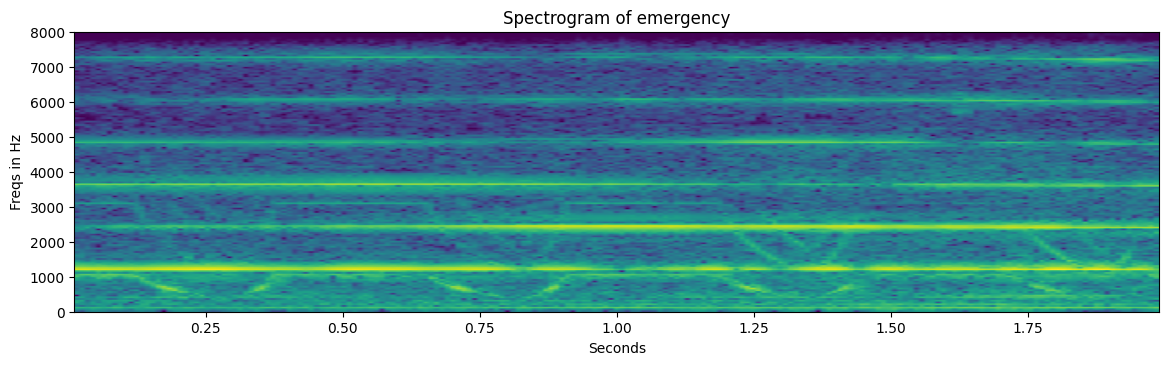

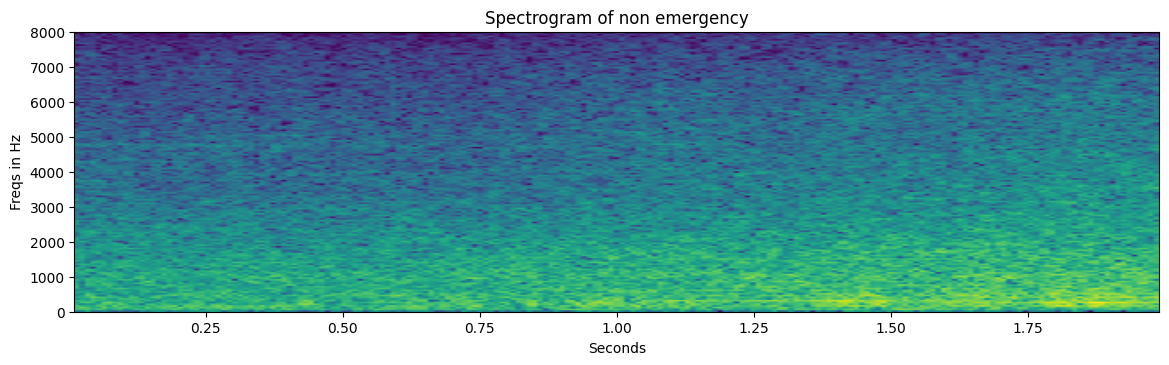

In [63]:
freqs, times, spectrogram = log_specgram(emergency[35], sample_rate)
plot(spectrogram,"emergency")

freqs, times, spectrogram = log_specgram(non_emergency[35], sample_rate)
plot(spectrogram,"non emergency")

Understand the shape of the spectrogram:

In [64]:
spectrogram.shape

(199, 161)

array([-15.575486 , -12.7084675, -10.321972 , -10.88457  , -13.834395 ,
       -11.873345 , -12.735329 , -10.884907 , -11.905026 , -12.934278 ,
       -11.877053 , -12.938899 , -10.983666 , -13.229616 , -12.708224 ,
       -13.509246 , -13.072082 , -12.255045 , -11.2173   , -12.414617 ,
       -14.078011 , -13.788856 , -13.033925 , -14.271732 , -13.406035 ,
       -14.840687 , -13.030424 , -13.702069 , -12.194617 , -11.808323 ,
       -13.498567 , -14.070996 , -13.045364 , -12.865691 , -15.32106  ,
       -14.645406 , -13.01926  , -11.747046 , -15.439046 , -12.791425 ,
       -12.659919 , -15.946685 , -12.676854 , -14.271466 , -14.438596 ,
       -13.373798 , -15.43779  , -14.18673  , -15.91461  , -17.066963 ,
       -14.880674 , -17.846455 , -13.438975 , -14.584175 , -15.099297 ,
       -15.432151 , -17.176888 , -14.46726  , -14.187905 , -16.284077 ,
       -17.996298 , -19.971926 , -15.289653 , -15.974499 , -15.171322 ,
       -16.025553 , -16.350607 , -16.872051 , -14.942889 , -17.5

Extract the spectrogram features

In [65]:
def extract_spectrogram_features(x_tr):
  features=[]
  for i in x_tr:
    _, _, spectrogram = log_specgram(i, sample_rate)

    mean = np.mean(spectrogram, axis=0)
    std = np.std(spectrogram, axis=0)
    spectrogram = (spectrogram - mean) / std

    features.append(spectrogram)

  return np.array(features)

In [66]:
x_tr_features  = extract_spectrogram_features(x_tr)
x_val_features = extract_spectrogram_features(x_val)

In [67]:
x_tr_features

array([[[ 1.6476988 ,  1.9494846 ,  1.1485796 , ...,  0.32136077,
         -0.01275241, -0.24006169],
        [ 1.3207297 ,  0.6092433 ,  0.95026803, ...,  0.50897086,
          0.51958895,  0.33303624],
        [ 1.1402142 ,  1.1941878 ,  1.1133524 , ...,  0.67505056,
          0.72951543,  0.5507573 ],
        ...,
        [-0.724952  ,  0.83848476,  0.18103221, ..., -0.5883632 ,
         -0.65602756, -0.4863356 ],
        [-2.0237105 ,  1.4107394 , -0.17492911, ..., -0.5168598 ,
         -0.68951416, -0.632595  ],
        [ 0.78304875,  0.26038283, -0.25544494, ..., -0.7403059 ,
         -0.57630193, -0.34048593]],

       [[-0.34604618, -1.1639873 , -0.6433292 , ..., -0.8435379 ,
         -0.84714395, -0.68951344],
        [-0.91991866, -1.2515671 , -1.0869874 , ..., -0.7313272 ,
         -0.7200669 , -0.5700634 ],
        [-1.3197368 , -1.3638282 , -1.3375823 , ..., -0.90811646,
         -0.60942554, -0.28165483],
        ...,
        [-0.5854017 , -0.8486964 ,  0.89836264, ...,  

**Define architecture**

Now, we will define the LSTM architecture for solving the task

In [68]:
def lstm(x_tr):
  K.clear_session()
  inputs = Input(shape=(x_tr.shape[1],x_tr.shape[2]))

  #lstm
  x = LSTM(128)(inputs)
  x = Dropout(0.3)(x)

  #dense
  x= Dense(64,activation='relu')(x)
  x= Dense(1,activation='sigmoid')(x)

  model = Model(inputs, x)

  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

  mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

  return model,mc

Define the model:

In [69]:
model, mc = lstm(x_tr_features)

Understand the no. of parameters and shape of each layer:

In [70]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 199, 161)]        0         
                                                                 
 lstm (LSTM)                 (None, 128)               148480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 156801 (612.50 KB)
Trainable params: 156801 (612.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model

In [71]:
history=model.fit(x_tr_features, y_tr, epochs=10, callbacks=[mc], batch_size=32, validation_data=(x_val_features,y_val))

Epoch 1/10
85/85 [==============================] - ETA: 0s - loss: 0.6426 - acc: 0.6253
Epoch 1: val_acc improved from -inf to 0.75748, saving model to best_model.hdf5
85/85 [==============================] - 33s 356ms/step - loss: 0.6426 - acc: 0.6253 - val_loss: 0.5509 - val_acc: 0.7575
Epoch 2/10
85/85 [==============================] - ETA: 0s - loss: 0.4414 - acc: 0.8064
Epoch 2: val_acc did not improve from 0.75748
85/85 [==============================] - 30s 349ms/step - loss: 0.4414 - acc: 0.8064 - val_loss: 0.6047 - val_acc: 0.7409
Epoch 3/10
85/85 [==============================] - ETA: 0s - loss: 0.3542 - acc: 0.8541
Epoch 3: val_acc improved from 0.75748 to 0.80066, saving model to best_model.hdf5
85/85 [==============================] - 30s 352ms/step - loss: 0.3542 - acc: 0.8541 - val_loss: 0.6382 - val_acc: 0.8007
Epoch 4/10
85/85 [==============================] - ETA: 0s - loss: 0.2301 - acc: 0.9163
Epoch 4: val_acc improved from 0.80066 to 0.96346, saving model to be

Load the weights of the best model:

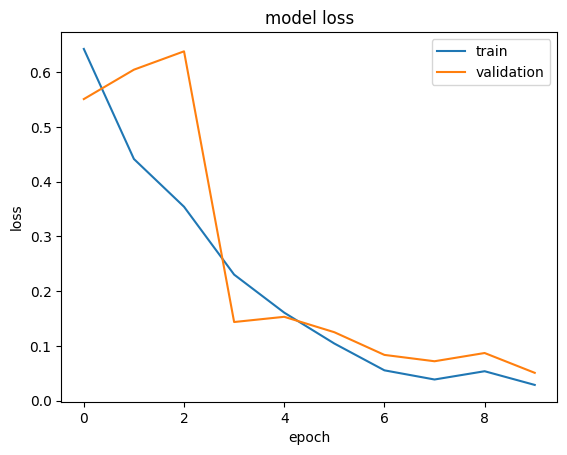

In [76]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper right')
plt.show()

In [72]:
model.load_weights('best_model.hdf5')

Evaluating the performance of the model on validation set:

In [73]:
_,acc = model.evaluate(x_val_features,y_val)
print("Accuracy:",acc)

10/10 [==============================] - 1s 121ms/step - loss: 0.0506 - acc: 0.9867
Accuracy: 0.9867109656333923


**Inference**

Let us make predictions on the validation data

In [74]:
ind=1
test_audio = x_val[ind]
ipd.Audio(test_audio,rate=16000)

In [75]:
feature = x_val_features[ind]
prob = model.predict(feature.reshape(1,-1,feature.shape[1]))
if (prob[0][0] < 0.5 ):
  pred='emergency'
else:
  pred='non emergency'
print("Prediction:",pred)

1/1 [==============================] - 1s 550ms/step
Prediction: emergency


Lets train conv1d on the same spectrogram features. So, lets define the conv1d model


In [77]:
model, mc = conv1d(x_tr_features)

Understand the input and output shape of each layer:

In [78]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 199, 161)]        0         
                                                                 
 conv1d (Conv1D)             (None, 199, 8)            16752     
                                                                 
 dropout (Dropout)           (None, 199, 8)            0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 99, 8)             0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 99, 16)            1424      
                                                                 
 dropout_1 (Dropout)         (None, 99, 16)            0         
                                                             

Training the model:

In [79]:
history=model.fit(x_tr_features, y_tr, epochs=10, callbacks=[mc], batch_size=32, validation_data=(x_val_features,y_val))

Epoch 1/10
85/85 [==============================] - ETA: 0s - loss: 0.6376 - acc: 0.6868
Epoch 1: val_acc improved from -inf to 0.81063, saving model to best_model.hdf5
85/85 [==============================] - 9s 88ms/step - loss: 0.6376 - acc: 0.6868 - val_loss: 0.4876 - val_acc: 0.8106
Epoch 2/10
84/85 [============================>.] - ETA: 0s - loss: 0.3972 - acc: 0.8155
Epoch 2: val_acc improved from 0.81063 to 0.83389, saving model to best_model.hdf5
85/85 [==============================] - 6s 68ms/step - loss: 0.3972 - acc: 0.8149 - val_loss: 0.3973 - val_acc: 0.8339
Epoch 3/10
84/85 [============================>.] - ETA: 0s - loss: 0.2740 - acc: 0.8914
Epoch 3: val_acc improved from 0.83389 to 0.89369, saving model to best_model.hdf5
85/85 [==============================] - 6s 72ms/step - loss: 0.2735 - acc: 0.8919 - val_loss: 0.3247 - val_acc: 0.8937
Epoch 4/10
84/85 [============================>.] - ETA: 0s - loss: 0.2102 - acc: 0.9167
Epoch 4: val_acc improved from 0.89369

Load the best saved model

In [80]:
model.load_weights('best_model.hdf5')

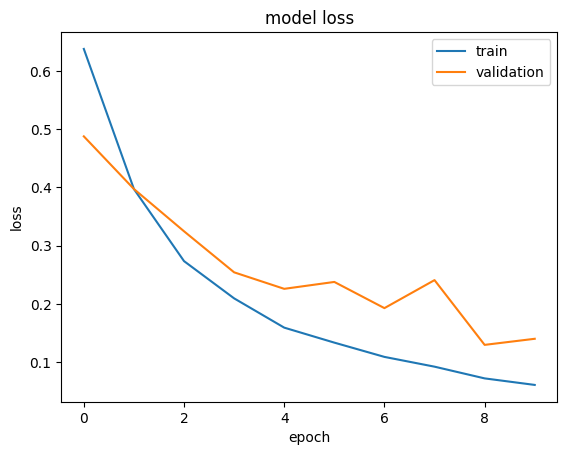

In [81]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper right')
plt.show()

Evaluating the performance of the model:

In [82]:
_,acc = model.evaluate(x_val_features,y_val)
print("Accuracy:",acc)

10/10 [==============================] - 0s 27ms/step - loss: 0.1299 - acc: 0.9601
Accuracy: 0.960132896900177


**Inference**:

Let us make predictions on the validation data


In [83]:
ind=1
test_audio = x_val[ind]
ipd.Audio(test_audio,rate=16000)

In [84]:
feature = x_val_features[ind]
prob = model.predict(feature.reshape(1,-1,feature.shape[1]))
if (prob[0][0] < 0.5 ):
  pred='emergency'
else:
  pred='non emergency'

print("Predicion:",pred)

1/1 [==============================] - 0s 114ms/step
Predicion: emergency
